<a href="https://colab.research.google.com/github/pagano81/git_test/blob/master/Primera_red_convolucionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iniciamos la red con una semilla de aleatoriedad, con el fin de hacer reproducible los resultados, esto es, que siempre iniciaremos con los mismos valores en los pesos iniciales de las neuronas.

Posteriormente cargaremos los datos y los dividiremos en conjunto de entrenamiento y conjunto de prueba.
Los datos los convertimos en valores de punto flotante, y finalmente los normalizaremos entre 1 y 0, tomando en cuenta que son 255 valores en cada uno de los colores RGB

Las etiquetas las convertiremos en una matriz binaria.

# - 0 --> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# - 1 --> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# - 2 --> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# - 3 --> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# - 4 --> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# - 5 --> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# - 6 --> [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
# - 7 --> [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
# - 8 --> [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
# - 9 --> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Vamos a iniciar con una red neuronal sencilla, secuencial con una capa convolucionada sin capa de abandono y luego una capa de reducción de características. 

Utilizaremos padding o acolchonamiento(relleno del contorno de la imagen con ceros), para que el filtro no pierda los contornos de las imágenes

(Las capas de convolucion van aumentando el número de filtros, aumentando de 32, 64 y 128, con la función de activación ReLu, la cual da el valor de x si x > 0, o 0 si x <= 0. .)

Ahora comienzan las llamadas convoluciones: Estas consisten en tomar grupos de pixeles cercanos de la imagen de entrada e ir operando matemáticamente (producto escalar) contra una pequeña matriz que se llama kernel.  Ese kernel tiene un tamaño de 3×3 pixels y con ese tamaño logra visualizar todas las neuronas de entrada (de izquierda-derecha, de arriba-abajo) y asi logra generar una nueva matriz de salida, que en definitiva será nuestra nueva capa de neuronas ocultas. Como la imagen es a color, el kernel realmente sería de 3x3x3 es decir: un filtro con 3 kernels de 3×3; luego  esos 3 filtros se suman (y se le suma una unidad bias o de sesgo) y conformarán 1 salida (cómo si fuera 1 solo canal).

Cada filtro (kernel) es una matriz de salida. El conjunto de filtros hacen lo que se llama mapeo o cartografía de características. Serían 32768 neuronas en la primera capa 32*32 pixeles por 32 filtros.

Si hiciéramos una nueva convolución a partir de esta capa, el número de neuronas de la próxima capa requeriría un poder computacional importante. Por ello y para reducir el tamaño de la próxima capa de neuronas hacemos un muestreo preservando las características más importantes que detectó cada filtro. Hay diversos tipos de muestreo  (subsampling), el más usado es: Max-Pooling.

Esto quiere decir que recorreremos cada una de las 32 imágenes de características obtenidas anteriormente de 33x33px de izquierda-derecha, arriba-abajo PERO en vez de tomar de a 1 pixel, tomaremos de «2×2» (2 de alto por 2 de ancho = 4 pixeles) e iremos preservando el valor más alto de entre esos 4 pixeles (por eso lo de Max).  En este caso, usando 2×2, la imagen resultante es reducida a la mitad. Luego de este proceso de submuestreo nos quedarán  32 imágenes de 16×16, pasando de 32768 neuronas a  8192, las cuales son bastantes menos y que en teoría deberían seguir almacenando la información más importante para detectar características deseadas.

Así suscesivamente hasta la última capa de la red convolucionada. La salida de esta capa, alimentará a una red densa que se encargará de clasificar a través de la función de activación Softmax, la cual da como salida un vector con las probabilidades de pertenencia a cada categoría, y obviamente, se elige la probabilidad mayor.

En el caso de la CNN, deberemos ajustar el valor de los pesos de los distintos kernels. Esto es una gran ventaja al momento del proceso de  aprendizaje pues como vimos cada kernel es de un tamaño reducido, en nuestro ejemplo en la primer convolución es de tamaño de 3×3, eso son sólo 9 parámetros que debemos ajustar en 32 filtros dan un total de 288 parámetros.

En la red densa de clasificación, utilizamos Kernel_constraint (restricción del filtro), que es un método de regularización, que se utiliza para forzar un valor absoluto en la magnitud del vector de peso de las neuronas, proyectando un gradiente descendiente para forzar la restricción. En la práctica es normalizar los parámetros de tal manera que satisfagan la restricción del valor absoluto del vector de pesos de cada neurona a un valor por lo general entre 3 y 4.  ∥w⃗ ∥2<c.
Lo anterior puede mejorar el desempeño de una red, evitando que se desborde del límite impuesto. Si L2 sobrepasa del valor C, se escala toda la matriz de pesos por un factor que reduce la norma a C.
Casi siempre, va de la mano con las capas de abandono, las cuales son la manera más simple de evitar el sobreajuste en las redes neuronales.

Posteriormente, utilizaremos dos algoritmos optimizadores, cuales son SGD, Adam
, dos funciones de activación (ReLu y Leaky Relu). De la misma manera jugaremos con la tasa de aprendizaje, las iteraciones y el tamaño de los lotes.



170500096/170498071 [==============================] - 4s 0us/step


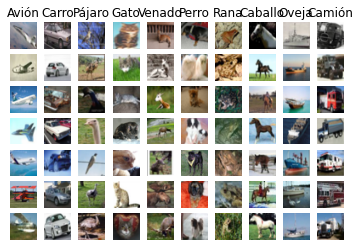

Datos entrenamiento:  (50000, 32, 32, 3)
Datos de prueba:  (10000, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
____________________________________________

In [ ]:
# Red neuronal convolucional sencilla con SGD para CIFAR-10 Dataset
import numpy
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(10)


#K.set_image_dim_ordering('th')
# semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)
# cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Sacamos una muestra de las imágenes. 7 Muestras de cada catergoría en una matriz de 7(filas) por 10(columnas)
classes = ['Avión', 'Carro', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Oveja', 'Camión']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('Off')
            if i == 0:
                  plt.title(cls)
plt.show()

# normalizamos las entradas 0-255 para 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


print('Datos entrenamiento: ',X_train.shape)
print('Datos de prueba: ', X_test.shape)

# Creacion del modelo
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu',kernel_constraint=maxnorm(3)))
#model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Esta es la red clasificadora
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilacion del modelo
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Ajustamos el modelo
historial= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=16)

# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precision: %.2f%%" % (scores[1]*100))

<function matplotlib.pyplot.show>

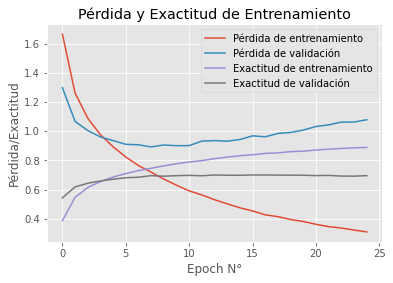

In [ ]:
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epochs))
plt.plot(epoch_values, historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, historial.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, historial.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show

In [ ]:
test_lost, test_accuracy=model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0781 - accuracy: 0.6954


Con esta red, solo logramos una exactitud de solo el 68%, a partir de la décimo primera iteración, la red había convergido, por más que se aumenten las iteraciones no va a mejorar.

Ahora utilizaremos la mis red, pero le cambiaremos la tasa de aprendizaje de 0.01 a 0.001

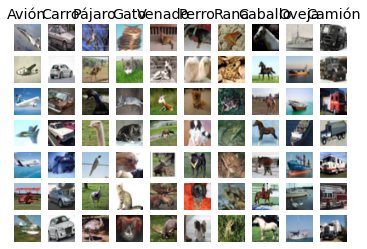

Datos entrenamiento:  (50000, 32, 32, 3)
Datos de prueba:  (10000, 32, 32, 3)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________________________________________

In [ ]:
# Red neuronal convolucional sencilla con SGD para CIFAR-10 Dataset
import numpy
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(10)


#K.set_image_dim_ordering('th')
# semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)
# cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Sacamos una muestra de las imágenes. 7 Muestras de cada catergoría en una matriz de 7(filas) por 10(columnas)
classes = ['Avión', 'Carro', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Oveja', 'Camión']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('Off')
            if i == 0:
                  plt.title(cls)
plt.show()

# normalizamos las entradas 0-255 para 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


print('Datos entrenamiento: ',X_train.shape)
print('Datos de prueba: ', X_test.shape)

# Creacion del modelo
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu',kernel_constraint=maxnorm(3)))
#model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Esta es la red clasificadora
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilacion del modelo
epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Ajustamos el modelo
historial= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=16)

# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precision: %.2f%%" % (scores[1]*100))

<function matplotlib.pyplot.show>

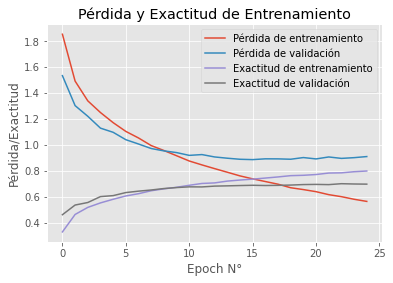

In [ ]:
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epochs))
plt.plot(epoch_values, historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, historial.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, historial.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show

Como vimos, cambiamos el la tasa de aprendizaje de 0.01 a 0.001, sin embargo, escasamente logramos obtener un punto porcentual extra de exactitud pasando de 68,76 a 69.68%.
Por lo general, las tasas de aprendizaje van de la mano con los lotes de datos aser procesados. Evaluaremos las dos tasas de aprendizaje pero ahora con un lote de 128, lo teníamos en 16.

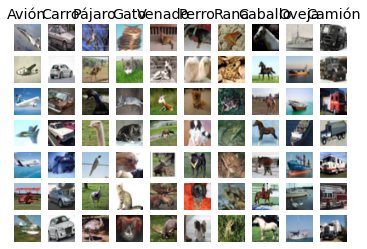

Datos entrenamiento:  (50000, 32, 32, 3)
Datos de prueba:  (10000, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________________________________________

In [ ]:
# Red neuronal convolucional sencilla con SGD para CIFAR-10 Dataset
import numpy
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(10)


#K.set_image_dim_ordering('th')
# semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)
# cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Sacamos una muestra de las imágenes. 7 Muestras de cada catergoría en una matriz de 7(filas) por 10(columnas)
classes = ['Avión', 'Carro', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Oveja', 'Camión']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('Off')
            if i == 0:
                  plt.title(cls)
plt.show()

# normalizamos las entradas 0-255 para 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


print('Datos entrenamiento: ',X_train.shape)
print('Datos de prueba: ', X_test.shape)

# Creacion del modelo
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu',kernel_constraint=maxnorm(3)))
#model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Esta es la red clasificadora
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilacion del modelo
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Ajustamos el modelo
historial= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precision: %.2f%%" % (scores[1]*100))

<function matplotlib.pyplot.show>

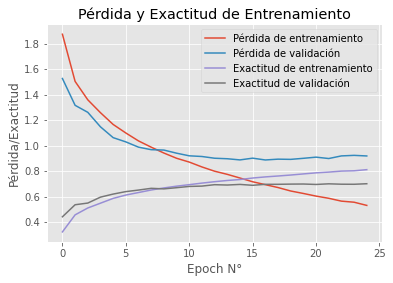

In [ ]:
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epochs))
plt.plot(epoch_values, historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, historial.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, historial.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show

NO hubo ningún cambio en la exctitud de la red aunque s demoró menos entrenando.
Cambiaremos a 0.001 y un lote de 128

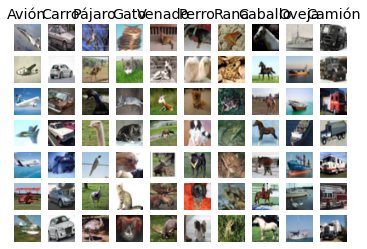

Datos entrenamiento:  (50000, 32, 32, 3)
Datos de prueba:  (10000, 32, 32, 3)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________________________________________

In [ ]:
# Red neuronal convolucional sencilla con SGD para CIFAR-10 Dataset Tasa aprendizaje 0.001 y lote de 128
import numpy
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(10)


#K.set_image_dim_ordering('th')
# semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)
# cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Sacamos una muestra de las imágenes. 7 Muestras de cada catergoría en una matriz de 7(filas) por 10(columnas)
classes = ['Avión', 'Carro', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Oveja', 'Camión']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('Off')
            if i == 0:
                  plt.title(cls)
plt.show()

# normalizamos las entradas 0-255 para 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


print('Datos entrenamiento: ',X_train.shape)
print('Datos de prueba: ', X_test.shape)

# Creacion del modelo
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu',kernel_constraint=maxnorm(3)))
#model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Esta es la red clasificadora
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilacion del modelo
epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Ajustamos el modelo
historial= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precision: %.2f%%" % (scores[1]*100))

<function matplotlib.pyplot.show>

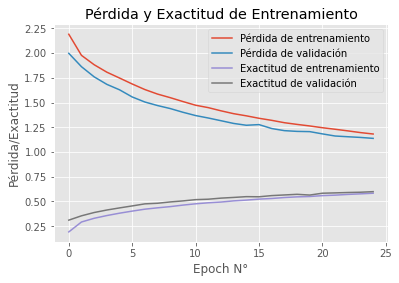

In [ ]:
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epochs))
plt.plot(epoch_values, historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, historial.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, historial.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show

Hubo un deterioro muy significativo en la exactitud de la red, lo que implica que a bajas tasas de aprendizaje, los lotes deben ser más pequeños, eso genera un aumento del tiempo de procesador.
Ahora cambiaremos el optimizador, cambiaremos de SGD a Adam y evidenciremos los cambios. Dejaremos tasa de aprendizaje de 0.001 y un lote de 128.

Si bien es cierto que SGD actualiza los parámetros después de cada muestra y no al final de todo el lote de entrenamiento, tiene una naturaleza estocástica y por ende un alto costo computacional, hay otros algoritmos de optimización que reemplazan a SGD. Por lo que aparece ADAM como el mejor optiizador por el momento, heredando las ventajas deAdagrad y de RMSProp.
Adagrad, tiene como ventaja, que utiliza una tasa de aprendizaje baja para los datos más frecuentes y una más alta para los datos más dispersos, contrario a SDG, que utiliza la misma tasa de aprendizaje para todos los datos.
Adam se ha probado en diferentes bibliotecas, y cada una tiene su propio ajuste, para keras los mejores parámetros son:
lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0

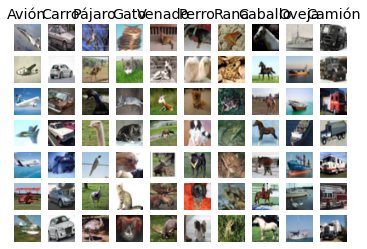

Datos entrenamiento:  (50000, 32, 32, 3)
Datos de prueba:  (10000, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________________________________________

In [ ]:
# Red neuronal convolucional sencilla con SGD para CIFAR-10 Dataset Tasa aprendizaje 0.001 y lote de 128 y adam
import numpy
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(10)


#K.set_image_dim_ordering('th')
# semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)
# cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Sacamos una muestra de las imágenes. 7 Muestras de cada catergoría en una matriz de 7(filas) por 10(columnas)
classes = ['Avión', 'Carro', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Oveja', 'Camión']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('Off')
            if i == 0:
                  plt.title(cls)
plt.show()

# normalizamos las entradas 0-255 para 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


print('Datos entrenamiento: ',X_train.shape)
print('Datos de prueba: ', X_test.shape)

# Creacion del modelo
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu',kernel_constraint=maxnorm(3)))
#model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Esta es la red clasificadora
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilacion del modelo
epochs = 25
lrate = 0.001
decay = lrate/epochs

sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-0, amsgrad=False, name="Adam", decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())

# Ajustamos el modelo
historial= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precision: %.2f%%" % (scores[1]*100))

<function matplotlib.pyplot.show>

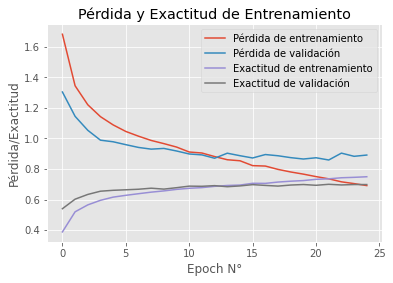

In [ ]:
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epochs))
plt.plot(epoch_values, historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, historial.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, historial.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show

Acá nos damos cuenta que con Adam se consgue converger muy rápido, pero en todos los modelos no pasamos del 70% de exactitud. La red llegó a su máximo en la iteración 22.
Por lo que vamos a cambiar de estrategia. Mantendremos la tasa de aprendizaje en 0.001,lotes de 128, optimizador Adam y empezaremos a agregar capas y neuronas.

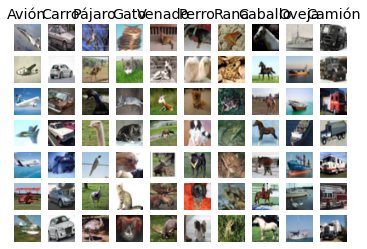

Datos entrenamiento:  (50000, 32, 32, 3)
Datos de prueba:  (10000, 32, 32, 3)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
__________________________________________

In [ ]:
# Red neuronal convolucional sencilla con SGD para CIFAR-10 Dataset Tasa aprendizaje 0.001 y lote de 128 y adam
# Agregamos dos capas mas de convolución con 64 filtros
import numpy
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(10)


#K.set_image_dim_ordering('th')
# semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)
# cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Sacamos una muestra de las imágenes. 7 Muestras de cada catergoría en una matriz de 7(filas) por 10(columnas)
classes = ['Avión', 'Carro', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Oveja', 'Camión']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('Off')
            if i == 0:
                  plt.title(cls)
plt.show()

# normalizamos las entradas 0-255 para 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


print('Datos entrenamiento: ',X_train.shape)
print('Datos de prueba: ', X_test.shape)

# Creacion del modelo
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu',kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))

#Esta es la red clasificadora
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilacion del modelo
epochs = 25
lrate = 0.001
decay = lrate/epochs

sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-0, amsgrad=False, name="Adam", decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())

# Ajustamos el modelo
historial= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precision: %.2f%%" % (scores[1]*100))

<function matplotlib.pyplot.show>

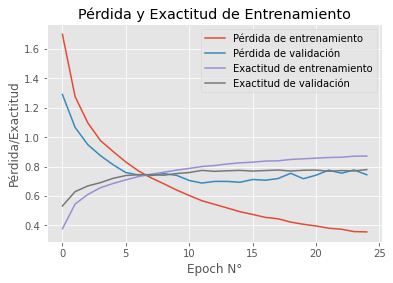

In [ ]:
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epochs))
plt.plot(epoch_values, historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, historial.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, historial.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show

Agreando una capa más de circonvolución con 64 filtros aumentamos la exactitud en la validación a un 77,95%, ostensiblemente mejor.
Exploraremos cambiar la función de activación a ver si mejoramos la exactitud de la validación.

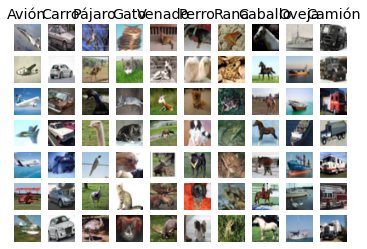

Datos entrenamiento:  (50000, 32, 32, 3)
Datos de prueba:  (10000, 32, 32, 3)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
__________________________________________

In [ ]:
# Red neuronal convolucional sencilla con SGD para CIFAR-10 Dataset Tasa aprendizaje 0.001 y lote de 128 y adam
#Cambimos la función de activación a Leaky relu
import numpy
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.layers import LeakyReLU

random.seed(10)


#K.set_image_dim_ordering('th')
# semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)
# cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Sacamos una muestra de las imágenes. 7 Muestras de cada catergoría en una matriz de 7(filas) por 10(columnas)
classes = ['Avión', 'Carro', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Oveja', 'Camión']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('Off')
            if i == 0:
                  plt.title(cls)
plt.show()

# normalizamos las entradas 0-255 para 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


print('Datos entrenamiento: ',X_train.shape)
print('Datos de prueba: ', X_test.shape)

# Creacion del modelo
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation='relu',kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))

#Esta es la red clasificadora
model.add(Flatten())
model.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilacion del modelo
epochs = 25
lrate = 0.001
decay = lrate/epochs

sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-0, amsgrad=False, name="Adam", decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())

# Ajustamos el modelo
historial= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precision: %.2f%%" % (scores[1]*100))

<function matplotlib.pyplot.show>

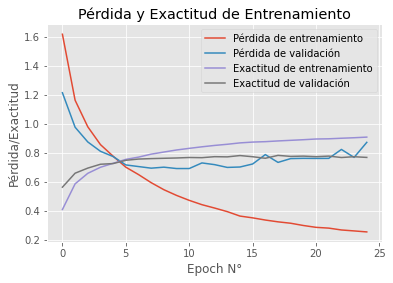

In [ ]:
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epochs))
plt.plot(epoch_values, historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, historial.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, historial.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show

Comparado con el modelo anterior, vemos como con esta función de activación mejora ostensiblemente la estabilidad de los procesos de aprendizaje y validación, converge mucho más rápido y se logró una exactitud del 76,87% en la validación y casi una 91% en el proceso de entrenamiento.
Agregaremos una última capa y si no se logra mejoría, aumentaremos los datos en redes subsiguientes.

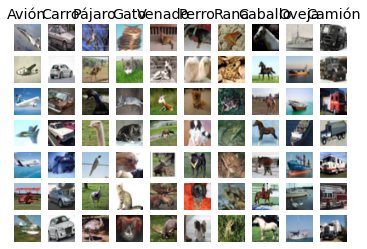

Datos entrenamiento:  (50000, 32, 32, 3)
Datos de prueba:  (10000, 32, 32, 3)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
__________________________________________

In [ ]:
# Red neuronal convolucional sencilla con SGD para CIFAR-10 Dataset Tasa aprendizaje 0.001 y lote de 128 y adam
#Cambimos la función de activación a Leaky relu en todas las capas
# Aumentamos las capas y las neuronas.
import numpy
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.layers import LeakyReLU

random.seed(10)


#K.set_image_dim_ordering('th')
# semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)
# cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Sacamos una muestra de las imágenes. 7 Muestras de cada catergoría en una matriz de 7(filas) por 10(columnas)
classes = ['Avión', 'Carro', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Oveja', 'Camión']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('Off')
            if i == 0:
                  plt.title(cls)
plt.show()

# normalizamos las entradas 0-255 para 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


print('Datos entrenamiento: ',X_train.shape)
print('Datos de prueba: ', X_test.shape)

# Creacion del modelo
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.01),kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))

#Esta es la red clasificadora
model.add(Flatten())
model.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilacion del modelo
epochs = 25
lrate = 0.001
decay = lrate/epochs

tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-0, amsgrad=False, name="Adam", decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())

# Ajustamos el modelo
historial= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precision: %.2f%%" % (scores[1]*100))

<function matplotlib.pyplot.show>

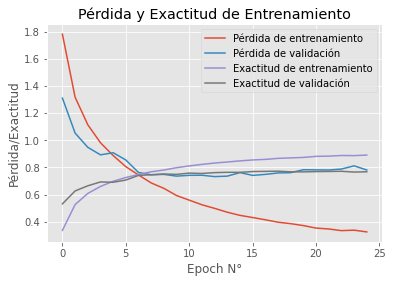

In [ ]:
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epochs))
plt.plot(epoch_values, historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, historial.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, historial.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show

No ha habido mejoría después de agregar una capa más de convolución y agrupamiento. Agregaremos más capas a la red de procesamiento de imagen y una más a la red de clasificación.

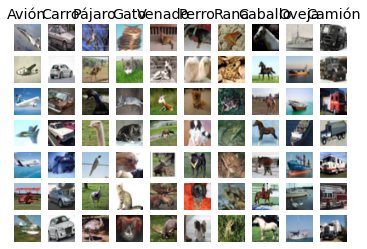

Datos entrenamiento:  (50000, 32, 32, 3)
Datos de prueba:  (10000, 32, 32, 3)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
__________________________________________

In [ ]:
# Red neuronal convolucional sencilla con SGD para CIFAR-10 Dataset Tasa aprendizaje 0.001 y lote de 128 y adam
#Cambimos la función de activación a Leaky relu en todas las capas
# Aumentamos las capas y las neuronas.
import numpy
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.layers import LeakyReLU

random.seed(10)


#K.set_image_dim_ordering('th')
# semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)
# cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Sacamos una muestra de las imágenes. 7 Muestras de cada catergoría en una matriz de 7(filas) por 10(columnas)
classes = ['Avión', 'Carro', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Oveja', 'Camión']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('Off')
            if i == 0:
                  plt.title(cls)
plt.show()

# normalizamos las entradas 0-255 para 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


print('Datos entrenamiento: ',X_train.shape)
print('Datos de prueba: ', X_test.shape)

# Creacion del modelo
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.01),kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.4))

#Esta es la red clasificadora
model.add(Flatten())
model.add(Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilacion del modelo
epochs = 25
lrate = 0.001
decay = lrate/epochs

tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-0, amsgrad=False, name="Adam", decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())

# Ajustamos el modelo
historial= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precision: %.2f%%" % (scores[1]*100))

<function matplotlib.pyplot.show>

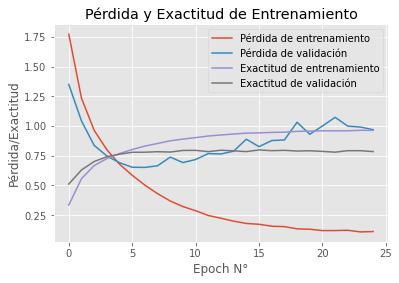

In [ ]:
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epochs))
plt.plot(epoch_values, historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, historial.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, historial.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show

In [ ]:
Esta vez aumentado el número de capas mejoró el desempeño, y se necesitan menos ciclos de entrenamiento para lograr la mejoría, en este
caso llegó a casi 80% de precisión en el ciclo 16, a partir de ese momomento, aumenta el error de validación sin mejorar la exactitud.
En este caso, dearemos el entrenamiento en 16 iteraciones y lo e haremos ahora es aumentarle los datos al invertir horizontalmente
los datos ya ingresado inicialmente.

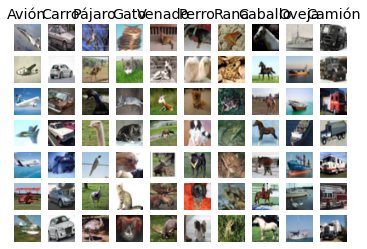

Datos entrenamiento:  (100000, 32, 32, 3)
Datos de prueba:  (20000, 32, 32, 3)
Datos Y entreniento:  (100000, 10)
Datos Y de prueba:  (20000, 10)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 

In [ ]:
# Red neuronal convolucional sencilla con SGD para CIFAR-10 Dataset Tasa aprendizaje 0.001 y lote de 128 y adam
#Cambimos la función de activación a Leaky relu en todas las capas
# Aumentamos las capas y las neuronas.
# Ahora duplicamos el número de datos invirtiéndolos horizontalmente.
import numpy
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.layers import LeakyReLU

random.seed(10)


#K.set_image_dim_ordering('th')
# semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)
# cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Sacamos una muestra de las imágenes. 7 Muestras de cada catergoría en una matriz de 7(filas) por 10(columnas)
classes = ['Avión', 'Carro', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Oveja', 'Camión']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('Off')
            if i == 0:
                  plt.title(cls)
plt.show()

#Aumentamos el número de datos ingresados
X_train = np.concatenate((X_train,np.flip(X_train)))
X_test = np.concatenate((X_test,np.flip(X_test)))
y_train = np.concatenate((y_train,np.flip(y_train)))
y_test = np.concatenate((y_test,np.flip(y_test)))

# normalizamos las entradas 0-255 para 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


print('Datos entrenamiento: ',X_train.shape)
print('Datos de prueba: ', X_test.shape)
print('Datos Y entreniento: ', y_train.shape)
print('Datos Y de prueba: ', y_test.shape)

# Creacion del modelo
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.01),kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


#Esta es la red clasificadora
model.add(Flatten())
model.add(Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilacion del modelo
epochs = 16
lrate = 0.001
decay = lrate/epochs

tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-0, amsgrad=False, name="Adam", decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())

# Ajustamos el modelo
historial= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precision: %.2f%%" % (scores[1]*100))

<function matplotlib.pyplot.show>

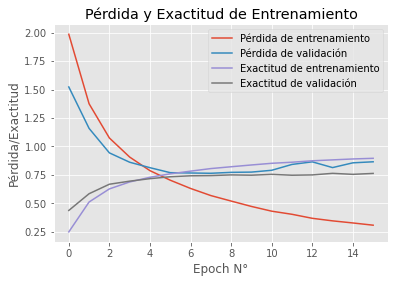

In [ ]:
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epochs))
plt.plot(epoch_values, historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, historial.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, historial.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show

Al aumentar los datos, aumenta el tiempo de procesamiento, se logra convergencia más rápido, de manera temprana aumenta el error de validación sin mejorar la exactitud de la red. Llama la atención que con más datos, la oscilación en la pérdida de validación oscila menos que en los modelos anteriores, así que aumentaremos el número de neuronas en la capa de clasificación.

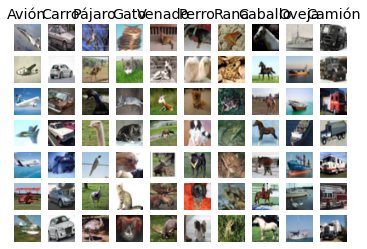

Datos entrenamiento:  (100000, 32, 32, 3)
Datos de prueba:  (20000, 32, 32, 3)
Datos Y entreniento:  (100000, 10)
Datos Y de prueba:  (20000, 10)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 

In [106]:
# Red neuronal convolucional sencilla con SGD para CIFAR-10 Dataset Tasa aprendizaje 0.001 y lote de 128 y adam
#Cambimos la función de activación a Leaky relu en todas las capas
# Aumentamos las capas y las neuronas.
# Ahora duplicamos el número de datos invirtiéndolos horizontalmente.
import numpy
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.layers import LeakyReLU

random.seed(1000)


#K.set_image_dim_ordering('th')
# semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)
# cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Sacamos una muestra de las imágenes. 7 Muestras de cada catergoría en una matriz de 7(filas) por 10(columnas)
classes = ['Avión', 'Carro', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Oveja', 'Camión']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('Off')
            if i == 0:
                  plt.title(cls)
plt.show()

#Aumentamos el número de datos ingresados
X_train = np.concatenate((X_train,np.flip(X_train)))
X_test = np.concatenate((X_test,np.flip(X_test)))
y_train = np.concatenate((y_train,np.flip(y_train)))
y_test = np.concatenate((y_test,np.flip(y_test)))
y1 = y_train

# normalizamos las entradas 0-255 para 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# una codificacion en caliente a la salida
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


print('Datos entrenamiento: ',X_train.shape)
print('Datos de prueba: ', X_test.shape)
print('Datos Y entreniento: ', y_train.shape)
print('Datos Y de prueba: ', y_test.shape)

# Creacion del modelo
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32,3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.01),kernel_constraint=maxnorm(3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(Conv2D(128, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))



#Esta es la red clasificadora
model.add(Flatten())
model.add(Dense(1024, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_constraint=maxnorm(3)))
model.add(Dense(num_classes, activation='softmax'))

# Compilacion del modelo
epochs = 26
lrate = 0.01
decay = lrate/epochs
tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-0, amsgrad=False, name="Adam", decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print(model.summary())


# Ajustamos el modelo
historial= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=256)

# Final evaluacion del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precision: %.2f%%" % (scores[1]*100))

<function matplotlib.pyplot.show>

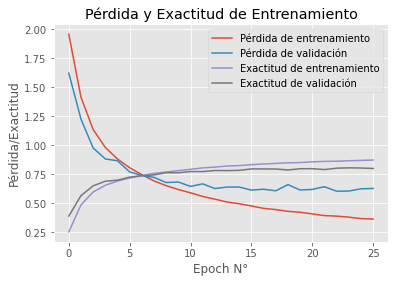

In [107]:
plt.style.use('ggplot')
plt.figure()
epoch_values = list(range(epochs))
plt.plot(epoch_values, historial.history['loss'], label='Pérdida de entrenamiento')
plt.plot(epoch_values, historial.history['val_loss'], label='Pérdida de validación')
plt.plot(epoch_values, historial.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(epoch_values, historial.history['val_accuracy'], label='Exactitud de validación')

plt.title('Pérdida y Exactitud de Entrenamiento')
plt.xlabel('Epoch N°')
plt.ylabel('Pérdida/Exactitud')
plt.legend()
plt.show

Con las modificaciones agregando capas de abandono, logramos subir la exactitud de la red a un 80%, lo cual es bastante bueno.
Ahora , agraremos la matriz de confusión para evidenciar el comportamiento real de la red, para ver si predice lo que se supone debe predecir.

Mounted at /content/drive
Esta figura corresponde a:  0.54163474 Avión
Esta figura corresponde a:  0.47118515 Avión


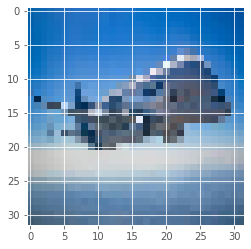

In [110]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
#drive.mount('/content/drive')
import matplotlib.image as mpimg
import PIL
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# load the image
img = load_img('/content/drive/MyDrive/avion.jpeg', target_size=(32, 32))
img1 = load_img('/content/drive/MyDrive/experimental.jpg', target_size=(32, 32))
plt.imshow(img)

# convert to array
img = img_to_array(img)
img1= img_to_array(img1)

# reshape into a single sample with 3 channels
img = img.reshape(1, 32, 32, 3)
img1= img1.reshape(1, 32, 32,3)

# prepare pixel data
img = img.astype('float32')
img = img / 255.0
img1 = img1.astype('float32')
img1 = img1 / 255.0
    
#predecir    
pred= model.predict(img)
print('Esta figura corresponde a: ',pred.max(), classes[np.argmax(pred.max())])
pred= model.predict(img1)
print('Esta figura corresponde a: ',pred.max(), classes[np.argmax(pred.max())])







Esta red ha podido predecir con cierta certitud y presición imágenes fuera del conuunto de datos propuesto. Comparado con inception y con AlexNet son dos redes neuronales en paralelo, por lo que los parámetros son mucho más grandes de los que se presentan en la presenta red. Parámetros totales: 62'369.155
Consumo de memoria de parámetros: 2'379.195MB Casi dos Gigas de memoria, lo cual sería imposible de realizar en un computador casero.
Inception utiliza parámetros del orden de 1000k. Utiliza de todas maneras, paralelización de procesos, algo inpensable en los computadores caseros actuales. Google net utiliza menos parámetros obteniendo mejores resultados.